In [ ]:
import csv
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn. metrics import confusion_matrix, f1_score, accuracy_score, recall_score, precision_score

In [ ]:
target_names = ['Openness', 'Conscientiousness' , 'Extraversion' , 'Agreeableness' , 'Neuroticism']

## load data into a pandas dataframe

In [ ]:
# separate features and labels
df = pd.read_csv('/content/Categories Of Facial Features - Sheet1.csv')

df = df.dropna()

df.shape

(133, 15)

CLEANSING DATASET

In [ ]:
df.columns = ['loE','soE','thickE','thinE','broadF','tinyF','loFA','wiFA','fleshyC','normalC','loN','soN','shN','blN','per']
df.head()

,loE,soE,thickE,thinE,broadF,tinyF,loFA,wiFA,fleshyC,normalC,loN,soN,shN,blN,per
0,1,0,1,0,1,0,0,1,0,1,1,0,0,1,1
1,1,0,1,0,0,1,1,0,0,1,1,0,1,0,2
2,0,1,0,1,1,0,0,1,1,0,1,0,0,1,2
3,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0
4,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0


In [ ]:
x = df.iloc[:, :-1] # eye, lips, nose, face types
y = df.iloc[:, -1] # personality types

In [ ]:
x.head()

,loE,soE,thickE,thinE,broadF,tinyF,loFA,wiFA,fleshyC,normalC,loN,soN,shN,blN
0,1,0,1,0,1,0,0,1,0,1,1,0,0,1
1,1,0,1,0,0,1,1,0,0,1,1,0,1,0
2,0,1,0,1,1,0,0,1,1,0,1,0,0,1
3,0,1,0,1,1,0,0,1,0,1,0,1,0,1
4,1,0,1,0,0,1,0,1,0,1,1,0,0,1


CALCULATING CONTRIBUTION OF EACH FEATURE TO EACH PERSONALITY

In [ ]:
nnn = x.values

nn = []
for i in range(len(nnn)):
  n = []
  for j in range(len(nnn[i])):
    if(j%2 == 0):
      n.append(nnn[i][j])
  nn.append(n)    

In [ ]:
nnn = nn
import numpy as np


data_A = []
data_B = []
data_C = []
data_D = []
data_E = []
for i in range(len(y)):
  if(y[i] == 0 ):
    data_A.append(nnn[i])
  elif(y[i] == 1 ):
    data_B.append(nnn[i])  
  elif(y[i] == 2):
    data_C.append(nnn[i])
  elif(y[i] == 3):
    data_D.append(nnn[i])
  elif(y[i] == 4):
    data_E.append(nnn[i])      

In [ ]:
data_A=np.array(data_A)
data_B=np.array(data_B)
data_C=np.array(data_C)
data_D=np.array(data_D)
data_E=np.array(data_E)

sum_A=np.sum(data_A,axis=0)/len(data_A)
sum_B=np.sum(data_B,axis=0)/len(data_B)
sum_C=np.sum(data_C,axis=0)/len(data_C)
sum_D=np.sum(data_D,axis=0)/len(data_D)
sum_E=np.sum(data_E,axis=0)/len(data_E)

CONVERTING AND CONCATINATING PERCENTAGE ARRAY

In [ ]:
start=0
end=7
sum_A=pd.DataFrame(sum_A).transpose()
sum_B=pd.DataFrame(sum_B).transpose()
sum_C=pd.DataFrame(sum_C).transpose()
sum_D=pd.DataFrame(sum_D).transpose()
sum_E=pd.DataFrame(sum_E).transpose()
op=sum_A.iloc [:,:]
co=sum_B.iloc [:,:]
ex=sum_C.iloc [:,:]
ag=sum_D.iloc [:,:]
ne=sum_E.iloc [:,:]
new=pd.concat([op,co,ex,ag,ne],axis=0)
new.columns=['long(Eyebrows)','thick(Eyebrows)','broad(Forehead)','Long(Face_shape)','fleshy(Cheek)','Long(Nose)','Sharp(Nose)']
new.index=['openness','conscientiousness','extraversion','agreeableness','neuroticism']
new.head()

,long(Eyebrows),thick(Eyebrows),broad(Forehead),Long(Face_shape),fleshy(Cheek),Long(Nose),Sharp(Nose)
openness,0.543478,0.565217,0.630435,0.500000,0.543478,0.608696,0.391304
conscientiousness,0.481481,0.666667,0.629630,0.518519,0.444444,0.740741,0.222222
extraversion,0.658537,0.512195,0.634146,0.487805,0.585366,0.609756,0.536585
agreeableness,0.363636,0.454545,0.545455,0.363636,0.545455,0.545455,0.363636
neuroticism,0.375000,0.875000,0.875000,0.500000,0.500000,0.375000,0.375000


HEATMAP FOR EVERY FEATURE WITH EVERY FEATRUE

<Axes: >

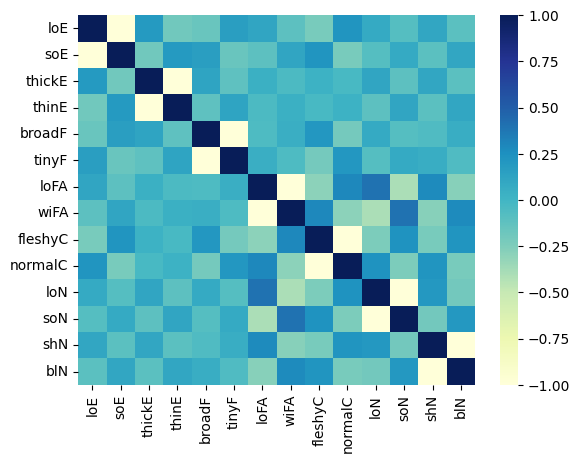

In [ ]:
import seaborn as sns

corr_matrix = x.corr()

# Plot heatmap
sns.heatmap(corr_matrix, cmap="YlGnBu")

##**SPLITING THE DATASET INTO TRAINING AND TESTING**

In [ ]:
from sklearn.preprocessing import LabelEncoder
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, stratify=y, random_state=42)

In [ ]:
X_train.shape

(79, 14)

DECISION TREE

In [ ]:
model_dt = DecisionTreeClassifier(random_state = 30)
model_dt.fit(X_train, y_train)

# use the model to make predictions on the test data
decision_y_pred = model_dt.predict(X_test)
accuracy_decision = accuracy_score(y_test, decision_y_pred)
print("Accuracy:", accuracy_decision)

Accuracy: 0.37037037037037035


In [ ]:
from sklearn.metrics import classification_report 
target_names = ['Openness', 'Conscientiousness' , 'Extraversion' , 'Agreeableness' , 'Neuroticism']
print(classification_report(y_test, decision_y_pred, target_names=target_names))

                   precision    recall  f1-score   support

         Openness       0.37      0.58      0.45        19
Conscientiousness       0.12      0.09      0.11        11
     Extraversion       0.57      0.47      0.52        17
    Agreeableness       0.00      0.00      0.00         4
      Neuroticism       0.00      0.00      0.00         3

         accuracy                           0.37        54
        macro avg       0.21      0.23      0.21        54
     weighted avg       0.33      0.37      0.34        54



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RANDOM FOREST

In [ ]:
Random = RandomForestClassifier(random_state = 42)

# Training the classifier on the training set
Random.fit(X_train, y_train)

# Making predictions on the testing set
Rando_y_pred = Random.predict(X_test)

accuracy = accuracy_score(y_test, Rando_y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3888888888888889


In [ ]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, Rando_y_pred, target_names=target_names))

                   precision    recall  f1-score   support

         Openness       0.41      0.79      0.54        19
Conscientiousness       0.00      0.00      0.00        11
     Extraversion       0.55      0.35      0.43        17
    Agreeableness       0.00      0.00      0.00         4
      Neuroticism       0.00      0.00      0.00         3

         accuracy                           0.39        54
        macro avg       0.19      0.23      0.19        54
     weighted avg       0.31      0.39      0.32        54



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GRADIENT BOOSTING

In [ ]:
model=GradientBoostingClassifier()
model.fit(X_train, y_train)
gradient_y_pred = model.predict(X_test)
accuracy_gradient = accuracy_score(y_test, gradient_y_pred)
print("Accuracy:", accuracy_gradient)

Accuracy: 0.42592592592592593


In [ ]:
print(classification_report(y_test, gradient_y_pred, target_names=target_names))

                   precision    recall  f1-score   support

         Openness       0.46      0.63      0.53        19
Conscientiousness       0.20      0.18      0.19        11
     Extraversion       0.53      0.47      0.50        17
    Agreeableness       0.33      0.25      0.29         4
      Neuroticism       0.00      0.00      0.00         3

         accuracy                           0.43        54
        macro avg       0.31      0.31      0.30        54
     weighted avg       0.40      0.43      0.41        54



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K NEIGHBORS

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict the test set labels
knn_y_pred = knn.predict(X_test)

In [ ]:
print(classification_report(y_test, knn_y_pred, target_names=target_names))

                   precision    recall  f1-score   support

         Openness       0.28      0.42      0.33        19
Conscientiousness       0.00      0.00      0.00        11
     Extraversion       0.23      0.18      0.20        17
    Agreeableness       0.00      0.00      0.00         4
      Neuroticism       0.00      0.00      0.00         3

         accuracy                           0.20        54
        macro avg       0.10      0.12      0.11        54
     weighted avg       0.17      0.20      0.18        54



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**SVM**

In [ ]:
svm = SVC(kernel='linear' , C = 0.1)

# Fit the classifier to the training data
svm.fit(X_train, y_train)

# Predict the test set labels
svm_y_pred = svm.predict(X_test)

In [ ]:
print(classification_report(y_test, svm_y_pred, target_names=target_names))

                   precision    recall  f1-score   support

         Openness       0.38      0.95      0.54        19
Conscientiousness       0.00      0.00      0.00        11
     Extraversion       0.50      0.18      0.26        17
    Agreeableness       0.00      0.00      0.00         4
      Neuroticism       0.00      0.00      0.00         3

         accuracy                           0.39        54
        macro avg       0.17      0.22      0.16        54
     weighted avg       0.29      0.39      0.27        54



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LOGISTIC REGRESSION

In [ ]:
lr = LogisticRegression(random_state=42)

# Train the model
lr.fit(X_train, y_train)

# Predict on test set
Logistic_y_pred = lr.predict(X_test)

In [ ]:
print(classification_report(y_test, Logistic_y_pred, target_names=target_names))

                   precision    recall  f1-score   support

         Openness       0.34      0.53      0.42        19
Conscientiousness       0.22      0.18      0.20        11
     Extraversion       0.38      0.35      0.36        17
    Agreeableness       0.00      0.00      0.00         4
      Neuroticism       0.00      0.00      0.00         3

         accuracy                           0.33        54
        macro avg       0.19      0.21      0.20        54
     weighted avg       0.28      0.33      0.30        54



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


PLOT EACH FEATURE WITH IT'S IMPORTANCE

[0.07955087 0.06495916 0.07666236 0.07408157 0.09058282 0.08545556
 0.06636319 0.08013025 0.07119411 0.0597253  0.06635584 0.05553198
 0.0706412  0.0587658 ]


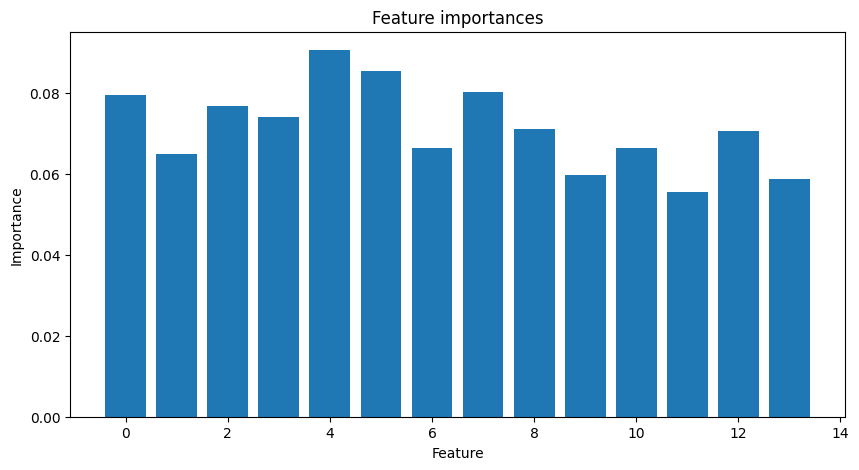

In [ ]:
import numpy as np
importances = Random.feature_importances_
print(importances)
indices = np.array(x)
plt.figure(figsize=(10, 5))
plt.bar(range(len(importances)), importances, align='center')
# plt.xticks(len(importances), indices, rotation='vertical')
plt.title("Feature importances")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

## PLOT OF EACH MODEL

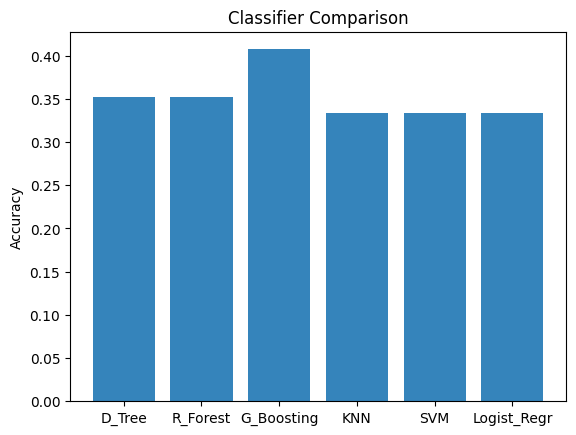

In [ ]:
classifiers = [DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier(),KNeighborsClassifier() , SVC() , LogisticRegression()]
names = ['D_Tree', 'R_Forest', 'G_Boosting','KNN' ,'SVM' , 'Logist_Regr']
accuracies = []

for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot the results
y_pos = np.arange(len(names))
plt.bar(y_pos, accuracies, align='center', alpha=0.9)
plt.xticks(y_pos, names)
plt.ylabel('Accuracy')
plt.title('Classifier Comparison')

plt.show()

**PREDICTING A CUSTOM INPUT**

In [ ]:
Tesing = [[0 ,1 ,0 ,1 ,0,0,0,1,1,1,1,0,1,1]]

Testing = np.array(Tesing)
Testing_pred = knn.predict(Testing)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print(target_names[int(Testing_pred)])

Extraversion


In [ ]:
# arr = []
# print("EYES")
# lon = input("long or short\n")
# if lon=="long":
#   arr.append(1)
#   arr.append(0) 
# else :
#   arr.append(0)
#   arr.append(1)
# thick = input("thick or thin\n")
# if thick=="thick":
#   arr.append(1)
#   arr.append(0) 
# else :
#   arr.append(0)
#   arr.append(1)
# print("FOREHEAD")
# broad = input("broad or tiny\n")
# if broad=="broad":
#   arr.append(1)
#   arr.append(0) 
# else :
#   arr.append(0)
#   arr.append(1)
# print("FACE")
# Long = input("long or wide\n")
# if Long=="long":
#   arr.append(1)
#   arr.append(0) 
# else :
#   arr.append(0)
#   arr.append(1)
# print("CHEEK")
# Fleshy = input("fleshy or normal\n")
# if Fleshy=="Fleshy":
#   arr.append(1)
#   arr.append(0) 
# else :
#   arr.append(0)
#   arr.append(1)
# print("NOSE")
# lon_nose = input("long or short\n")
# if lon_nose=="long":
#   arr.append(1)
#   arr.append(0) 
# else :
#   arr.append(0)
#   arr.append(1)
# sharp_nose = input("sharp or blunt\n")
# if sharp_nose=="sharp":
#   arr.append(1)
#   arr.append(0) 
# else :
#   arr.append(0)
#   arr.append(1)

In [ ]:
# Testing = []
# Testing.append(arr)
# Testing = np.array(Tesing)
# Testing_pred = knn.predict(Testing)
# print(target_names[int(Testing_pred)])